In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mlcookbook

from sklearn.datasets import load_boston, load_breast_cancer
from seaborn import load_dataset

%matplotlib inline

mlcookbook.diagnostics()

boston_data = load_boston()
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
data['Target'] = boston_data.target

breast_cancer_data = load_breast_cancer()
categorical_data = pd.DataFrame(
    breast_cancer_data.data, columns=breast_cancer_data.feature_names)
categorical_data['Target'] = breast_cancer_data.target

titanic_data = load_dataset('titanic')

2019/06/29 17:06
OS: win32
CPU Cores: 8
Python: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
NumPy: 1.14.5
Pandas: 0.23.3
Scikit-Learn: 0.20.0


In [2]:
print('Percent Missing')
mlcookbook.eda.percent_missing(titanic_data)

Percent Missing
Percent Missing Values: 

age: 19.87%
embarked: 0.22%
deck: 77.22%
embark_town: 0.22%


## Outliers

In [3]:
print('IQR outliers')
mlcookbook.eda.iqr_indices_of_outliers(data.iloc[:, 0])

IQR outliers


(array([367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384,
        385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404,
        405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
        419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438,
        439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478,
        479], dtype=int64),)

In [4]:
print('Z score outliers')
mlcookbook.eda.z_score_indices_of_outliers(data.iloc[:, 0])

Z score outliers


(array([380, 398, 404, 405, 410, 414, 418, 427], dtype=int64),)

In [5]:
print('Percentile outliers')
mlcookbook.eda.percentile_indices_of_outliers(data.iloc[:, 0])

Percentile outliers


(array([  0, 284, 285, 380, 405, 418], dtype=int64),)

In [6]:
print('Ellipses outliers')
mlcookbook.eda.ellipses_indices_of_outliers(data)

Ellipses outliers


(array([367, 374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 388,
        392, 394, 398, 400, 401, 403, 404, 405, 406, 407, 409, 410, 411,
        412, 413, 414, 415, 416, 417, 418, 419, 422, 425, 426, 427, 434,
        435, 436, 437, 438, 440, 444, 445, 454, 468, 469, 477, 479],
       dtype=int64),)

In [7]:
print('Isolation Forest outliers')
mlcookbook.eda.isolation_forest_indices_of_outliers(data)

Isolation Forest outliers


(array([141, 142, 143, 144, 145, 146, 155, 156, 161, 162, 163, 166, 195,
        197, 202, 203, 204, 225, 253, 257, 258, 261, 262, 263, 267, 283,
        364, 365, 367, 368, 369, 370, 371, 372, 374, 380, 384, 398, 405,
        410, 412, 414, 418, 419, 424, 426, 427, 437, 438, 489, 490],
       dtype=int64),)

In [8]:
print('One class SVM outliers')
mlcookbook.eda.one_class_svm_indices_of_outliers(data)

One class SVM outliers


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(array([  0,   2,   3,   5,   6,   7,   9,  10,  12,  13,  15,  16,  17,
         20,  21,  22,  25,  30,  31,  32,  33,  34,  35,  38,  39,  41,
         42,  43,  44,  48,  49,  50,  51,  53,  54,  55,  56,  63,  68,
         73,  75,  76,  79,  81,  89,  93,  94,  97,  99, 101, 107, 109,
        110, 112, 114, 115, 118, 119, 120, 121, 122, 123, 127, 130, 135,
        136, 138, 140, 141, 143, 144, 148, 151, 153, 154, 155, 161, 164,
        166, 167, 168, 171, 172, 176, 177, 180, 181, 185, 186, 192, 194,
        200, 201, 205, 206, 208, 209, 213, 214, 216, 220, 221, 222, 223,
        225, 226, 228, 229, 230, 234, 239, 242, 244, 247, 249, 255, 258,
        259, 260, 262, 263, 264, 265, 266, 267, 268, 271, 272, 273, 281,
        282, 283, 291, 292, 293, 297, 302, 305, 308, 309, 312, 314, 315,
        322, 323, 329, 332, 333, 337, 341, 343, 344, 346, 347, 349, 350,
        352, 353, 354, 359, 363, 364, 371, 373, 374, 375, 376, 378, 382,
        383, 385, 389, 390, 394, 397, 399, 403, 407

In [9]:
print('Outlier Report')
mlcookbook.eda.outlier_report(data)

Outlier Report
Detecting outliers 

Single feature outlier tests
         IQR Z Score Percentile Multiple       IQR %   Z Score % Percentile %  \
CRIM      66       8          6        8    0.130435   0.0158103    0.0118577   
INDUS      0       0          3        0           0           0   0.00592885   
NOX        0       0          2        0           0           0   0.00395257   
RM        30       8          5        8   0.0592885   0.0158103   0.00988142   
AGE        0       0          3        0           0           0   0.00592885   
DIS        5       5          6        5  0.00988142  0.00988142    0.0118577   
TAX        0       0          1        0           0           0   0.00197628   
PTRATIO   15       0          5        0   0.0296443           0   0.00988142   
B         77      25          3       25    0.152174   0.0494071   0.00592885   
LSTAT      7       5          6        5    0.013834  0.00988142    0.0118577   
Target    40       0          3        0   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'Ellipses Envelope': (array([367, 374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 388,
         392, 394, 398, 400, 401, 403, 404, 405, 406, 407, 409, 410, 411,
         412, 413, 414, 415, 416, 417, 418, 419, 422, 425, 426, 427, 434,
         435, 436, 437, 438, 440, 444, 445, 454, 468, 469, 477, 479],
        dtype=int64),),
 'Isolation Forest': (array([  8,  32,  48, 126, 141, 142, 143, 144, 145, 146, 147, 148, 152,
         155, 156, 159, 161, 162, 163, 166, 195, 202, 203, 204, 225, 228,
         253, 257, 258, 261, 262, 263, 267, 268, 283, 367, 368, 369, 370,
         374, 380, 410, 412, 414, 418, 426, 427, 437, 438, 489, 490],
        dtype=int64),),
 'One Class SVM': (array([  0,   2,   3,   5,   6,   7,   9,  10,  12,  13,  15,  16,  17,
          20,  21,  22,  25,  30,  31,  32,  33,  34,  35,  38,  39,  41,
          42,  43,  44,  48,  49,  50,  51,  53,  54,  55,  56,  63,  68,
          73,  75,  76,  79,  81,  89,  93,  94,  97,  99, 101, 107, 109,
         110, 

## Preprocessing

In [10]:
print('PCA')
mlcookbook.process.fit_PCA(data)

PCA
Total variance % explained: 99.47547798971576

Variance % explained by principal component:
0 : 52.40359199401038
1 : 11.90709019180578
2 : 9.14680592105265
3 : 6.065593317676156
4 : 5.329659989504557
5 : 4.189201829407195
6 : 3.0784920531932687
7 : 2.4340904719387266
8 : 1.334769086567469
9 : 1.192136172161672
10 : 0.859088493451943
11 : 0.790408698079883
12 : 0.7445497708660539


array([[-0.56709519,  0.15613447,  0.01698635, ..., -0.13715014,
        -0.0358962 ,  0.04556913],
       [-0.42633164,  0.25114179, -0.18768805, ...,  0.04660025,
         0.00684545,  0.0536297 ],
       [-0.58068173,  0.143294  ,  0.00128317, ...,  0.06890589,
        -0.00825431, -0.0158398 ],
       ...,
       [-0.18116716,  0.39693602, -0.20295807, ..., -0.02189769,
        -0.05947226,  0.07618167],
       [-0.17393509,  0.38548429, -0.23495641, ..., -0.01993153,
        -0.04965579,  0.077509  ],
       [-0.14446137,  0.35112255, -0.37054574, ..., -0.05930353,
        -0.02947907,  0.14699223]])

In [11]:
print('Oversampling binary label')
# TODO: Fix the oversampled number in each class
mlcookbook.process.oversample_binary_label(categorical_data, 'Target').head()

Oversampling binary label
Initial number of observations in each class:
1    357
0    212
Name: Target, dtype: int64

Oversampled number of observations in each class:
1    357
0    212
Name: Target, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [12]:
print('Oversampling with SMOTE Test')
mlcookbook.process.oversample_smote(categorical_data.drop(
    'Target', axis=1), categorical_data['Target'])

Oversampling with SMOTE Test
Previous training size: 569
Oversampled training size 714 

Previous label mean: 0.6274165202108963
Oversampled label mean: 0.5


(array([[1.79900000e+01, 1.03800000e+01, 1.22800000e+02, ...,
         2.65400000e-01, 4.60100000e-01, 1.18900000e-01],
        [2.05700000e+01, 1.77700000e+01, 1.32900000e+02, ...,
         1.86000000e-01, 2.75000000e-01, 8.90200000e-02],
        [1.96900000e+01, 2.12500000e+01, 1.30000000e+02, ...,
         2.43000000e-01, 3.61300000e-01, 8.75800000e-02],
        ...,
        [1.53234561e+01, 2.99707263e+01, 1.01083777e+02, ...,
         1.79001463e-01, 3.11818966e-01, 1.08457174e-01],
        [1.73657637e+01, 2.24860566e+01, 1.11286613e+02, ...,
         8.68820748e-02, 2.47378262e-01, 6.61560131e-02],
        [2.18723240e+01, 2.10745001e+01, 1.47686286e+02, ...,
         1.88164053e-01, 2.89384008e-01, 8.88447670e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,

In [13]:
print('Target Mean Encoding')
mlcookbook.process.target_encode(
    titanic_data['pclass'], titanic_data['pclass'], titanic_data['survived'])[0].head()

Target Mean Encoding


0    0.242363
1    0.629630
2    0.242363
3    0.629630
4    0.242363
Name: pclass_mean, dtype: float64

In [14]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint


X = data.drop('Target', axis=1)
y = data['Target']
model = RandomForestRegressor(n_jobs=-1)
parameters = {'n_estimators': [100, 300],
              'max_depth': [3, None],
              'max_features': sp_randint(1, X.shape[1]),
              'min_samples_split': sp_randint(2, 11),
              'min_samples_leaf': sp_randint(1, 11),
              'bootstrap': [True, False],
              'criterion': ['mse', 'mae']}

mlcookbook.ml.hyperparameter_random_search(
    X, y, model=model, parameters=parameters, num_iterations=5, num_folds=3)

Beginning random search at 2019-06-29 17:06:47


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Completed random search at 2019-06-29 17:06:55

Best Estimator: RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Best Parameters: {'bootstrap': True, 'criterion': 'mae', 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 300}
Best Score: 0.5451192831039922


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [100, 300], 'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002DE7B0AE400>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002DE7B0AE358>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002DE7B0AE6D8>, 'bootstrap': [True, False], 'criterion': ['mse', 'mae']},
          pre_dispatch='2*n_jobs', random_state

<Figure size 504x360 with 0 Axes>

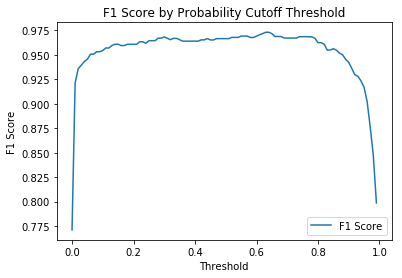

Threshold for Optimal F1 Score:


Threshold    0.630000
F1 Score     0.973202
Name: 63, dtype: float64

In [15]:
from sklearn.linear_model import LogisticRegression

X_categorical = categorical_data.drop('Target', axis=1)
y_categorical = categorical_data['Target']

logistic_model = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_model.fit(X_categorical, y_categorical)

mlcookbook.ml.optimal_probability_cutoff(
    logistic_model, X_categorical, y_categorical)

In [19]:
X = data.drop('Target', axis=1)
y = data['Target']
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(X, y)

prediction_intervals = mlcookbook.ml.ensemble_prediction_intervals(model, X)
prediction_intervals.head()

Generating predictions with the model
Generating upper and lower prediction intervals


,lower_PI,prediction,upper_PI
0,22.012375,25.253,35.035650
1,12.013850,21.981,29.090100
2,23.721275,34.542,49.700525
3,26.639600,34.241,49.685675
4,28.774250,35.710,37.900000
